# Тестовое задание для кандидата в команду валидации Альфа-Банка

**Привет!** На связи команда валидации Альфа-Банка. Мы отвечаем за то, чтобы модели, которые используются для принятия решений, были надежными, справедливыми и понятными. Твое задание — провести моделирование и валидацию кредитной модели. Удачи, и помни: мы верим в твои силы! 💪  

---

## Цель  
Проверить навыки анализа данных, валидации ML-моделей и умение формулировать выводы для бизнеса.  

---

## Датасет  
**Название:** [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit/data)  
**Описание:**  
Прогнозирование дефолта заемщика на основе финансовых и демографических признаков.  

**Признаки:**  
- `RevolvingUtilizationOfUnsecuredLines` (использование кредитных линий),  
- `age`, `MonthlyIncome`, `NumberOfDependents` и др.  

**Целевая переменная:** `SeriousDlqin2yrs` (дефолт: 0/1).  

---

## Задача  
Проведите валидацию модели кредитного скоринга (логистическая регрессия или градиентный бустинг) и подготовьте отчет.  

---

## Шаги  

### 1. Анализ и предобработка данных  
- Обработайте пропуски (например, в `MonthlyIncome`).  
- Исследуйте выбросы (например, возраст < 18 лет).  
- Визуализируйте распределения ключевых признаков.  
- Предложите методы борьбы с дисбалансом классов.  

### 2. Построение и оценка модели  
- Разделите данные на train/validation/test.  
- Обучите модель (логистическая регрессия или CatBoost/XGBoost).  
- Рассчитайте метрики: **AUC-ROC, Precision, Recall, F1-Score**.  
- Проверьте устойчивость модели через кросс-валидацию (5 folds).  

### 3. Интерпретация и этика  
- Выделите **топ-5 признаков**, влияющих на прогноз (SHAP/LIME).  
- Проверьте логичность влияния признаков (например, высокая долговая нагрузка → выше риск дефолта).  
- Оцените fairness модели: сравните метрики (FPR, TPR) для групп (например, **молодые** vs **старше 40 лет**).  

### 4. Отчет  
Подготовьте общие выводы по проведенной валидации, включив:  
- Выводы о качестве модели и её ограничениях.  
- Рекомендации по улучшению (например, сбор дополнительных данных).  
- Пример: *«Как изменится прогноз, если у заемщика появится иждивенец?»*  

---

## Технические требования  
- Язык: **Python** (Jupyter Notebook).  
- Код должен быть читаемым и содержать комментарии.  

---

## Критерии оценки  
1. Глубина анализа данных и обработки выбросов.  
2. Корректность выбранных метрик и их интерпретация.  
3. Качество визуализаций (распределения, важность признаков).  
4. Практичность рекомендаций в отчете.    

---

**Срок выполнения:** 7 дней.  
**Формат сдачи:**  
- Ноутбук в Collab/GitHub-репозиторий.    

---

Это задание покажет, как вы подходите к анализу реальных данных и делаете ML-модели прозрачными для бизнеса. Ждем твою работу! 🚀  

# Решение задания

## 1. Анализ и предобработка данных

### 0. Подготовка к анализу и предобработка

__ВАЖНО!!! Перед запуском кода, пожалуйста, выберите среду с GPU, поскольку без нее часть кода не будет поддерживаться__

Начну анализ и предварительную обработку данных с базового импорта всех необходимых для работы библиотек. Каждую библиотеку сопровожу комментарием о том, для чего она будет применяться.

In [ ]:
!pip install catboost

In [ ]:
# Импортирую основные библиотеки для работы

# Pandas - для работы с данными
import pandas as pd
# Numpy - для работы с массивами и вычислениями
import numpy as np
# Matplotlib и Seaborn для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Задаю стиль графиков
sns.set(style="whitegrid")
# SciPy - для статистических исследований
from scipy import stats
# Scikit-learn - для работы с данными, моделями и кросс-валидацией
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
# CatBoost - для построения бустинга
import catboost
# Shap - для анализа моделей машинного обучения
import shap
# Импортируем warnings для работы с предупреждениями
import warnings
warnings.filterwarnings('ignore')

# Google.Colab - для подключения к файлам, которые храняться на Гугл-Диске
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Теперь нужно считать данные, предоставленные в файле __cs-training.csv__, для того чтобы на основании работы с ними проводить эксперименты.

In [ ]:
# Считываю данные и записываю их в переменную
data = pd.read_csv("/content/drive/MyDrive/Alfa-Bank/cs-training.csv")
# Выведу первые 5 строчек в считанных данных
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
# Проверю число уникальных значений в столбце Unnamed: 0,
# чтобы убедиться в том, что этот столбец просто показывает на номер строки
assert data["Unnamed: 0"].nunique() == data.shape[0]

Вижу признак __Unnamed: 0__, который дублирует индекс со сдвигом на 1 единицу. Сразу же удаляю признак из данных, поскольку он никак не влияет на данные и дублирует номер строки.

In [ ]:
# Удаляю из данных признак Unnamed: 0
data = data.drop('Unnamed: 0', axis=1)
# Вывожу на экран первые 5 строк данных, после удаления Unnamed: 0
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 1. Обработка пропусков

Теперь, когда данные загружены и неинформативный признак удалён, нужно заняться обработкой пропусков в данных.

Для того, чтобы понять, в каких данных есть пропуски, посчитаем их количество по столбцам.

In [ ]:
# Определим число пропусков в каждом столбце
data.isna().sum(axis=0)

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Как видно пропуски наблюдаются только в признаках __MonthlyIncome__ и __NumberOfDependents__ - __29731__ и __3924__ пропуска соответственно.

Чтобы определить каким значением лучше заполнить пропуски в столбцах с данными, нужно посмотреть на основные статистические характеристики признаков, а также построить коробчатые диаграммы распределения каждого из признаков.

In [ ]:
# Выведем информацию по основным статистическим характеристикам признаков с пропусками
data[['MonthlyIncome', 'NumberOfDependents']].describe()

,MonthlyIncome,NumberOfDependents
count,1.202690e+05,146076.000000
mean,6.670221e+03,0.757222
std,1.438467e+04,1.115086
min,0.000000e+00,0.000000
25%,3.400000e+03,0.000000
50%,5.400000e+03,0.000000
75%,8.249000e+03,1.000000
max,3.008750e+06,20.000000


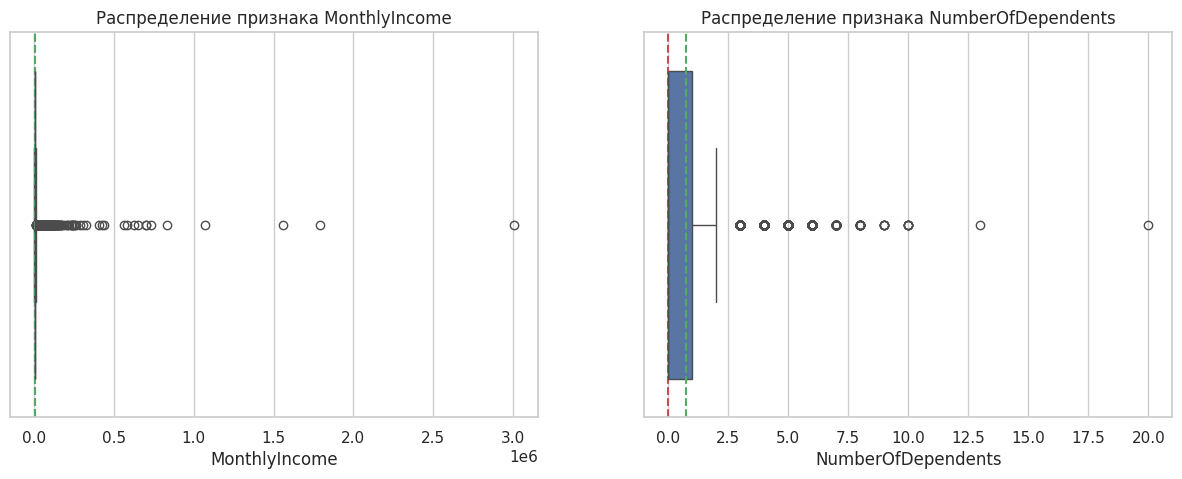

In [ ]:
# Построим визуализации признаков с помощью гистограмм

# Создаю пространство для визуализаций
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Оформляю гистограмму для признкака MonthlyIncome и помещаю в первое поле
boxplot1 = sns.boxplot(data=data, x='MonthlyIncome', ax=ax[0]);
boxplot1.set_title('Распределение признака MonthlyIncome');
boxplot1.set_xlabel('MonthlyIncome');
# Добавлю на график линии в виде медианы и среднего для признака
boxplot1.axvline(data['MonthlyIncome'].median(), color='r', linestyle='--');
boxplot1.axvline(data['MonthlyIncome'].mean(), color='g', linestyle='--');


# Оформляю гистограмму для признкака NumberOfDependents и помещаю во второе поле
boxplot2 = sns.boxplot(data=data, x='NumberOfDependents', ax=ax[1]);
boxplot2.set_title('Распределение признака NumberOfDependents');
boxplot2.set_xlabel('NumberOfDependents');
# Добавлю на график линии в виде медианы и среднего для признака
boxplot2.axvline(data['NumberOfDependents'].median(), color='r', linestyle='--');
boxplot2.axvline(data['NumberOfDependents'].mean(), color='g', linestyle='--');

По результатам построения графиков можно выделить:

* Для графика признака __MonthlyIncome__ лучшее решение - заполнить пропуски __медианным значением__. Видно, что среднее значение следует за выбросами, которых наиблюдается большое количество в правой части графика.
* Для графика признака __NumberOfDependents__ лучшее решение - заполнить пропуски __средним значением__, поспольку медиана у данного признака равна нулю.

In [ ]:
# Создаем словарь для определения значений, которыми будем заполнять пропуски
fill_dict = {"MonthlyIncome": data["MonthlyIncome"].median(),
             "NumberOfDependents": data["NumberOfDependents"].mean()
}

# Заполняем пропуски в данных используя словарь
data = data.fillna(fill_dict)
# Проверяем, что пропусков не осталось
data.isna().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Как видно, все пропуски в данных были заполнены, следовательно можно приступать к исследованию данных.

### 2. Исследование и избавление от выбросов

Теперь присутпим к исследованию данных и определнию выбросов в них. Для того, чтобы корректно отделить признаки, не являющиеся выбросами используем статистический анализ через z-score.

Примем за условие, что если модуль значения Z будет более 3 (т.е. точка более чем на 3 стандартных отклонения отходит от среднего значения в любую из сторон), то такое значение будем помечать как выброс.

In [ ]:
# Определим модуль значения отклонения от среднего, для каждого признака, кроме целевого
z_scores = np.abs(stats.zscore(data.drop("SeriousDlqin2yrs", axis=1)))
# Установим порог в 3 стандартных отклонения по модулю
threshold = 3
# Проверием каждую строку и каждый столбец на наличие как минимум одного отклонения
outliers = np.any(z_scores > threshold, axis=1)
# Удаляем строки с как минимум одним выбросом
cleaned_data = data[~outliers].copy()

Теперь рассмотрим данные внимательнее и проанализируем, в каких столбцах чаще всего встречались выбросы

In [ ]:
# Выделяем данные с выбросами
outliers_data = data[outliers].copy()
# Создадим словарь, который будет отражать число пропусков в столбцах
outliers_count = {key: 0 for key in outliers_data.columns[1:]}
# Считаем значение для каждой записи
for i in range(len(outliers_data.columns[1:])):
    # Находим число записей в столбце, больших чем 3 по значению
    column_outliers = [row[i] for row in z_scores[outliers]]
    # Считаем число значений больших чем 3
    column_outliers = [True if x > 3 else False for x in column_outliers]
    # Суммируем число всех True
    column_outliers = sum(column_outliers)
    # Добавляем значение в словарь
    outliers_count[outliers_data.columns[1:][i]] = column_outliers

Имея на руках информацию о количестве выбросов в каждом из столбцов построим диаграмму, чтобы визуально определить, какой из признаков наиболее им подвержен

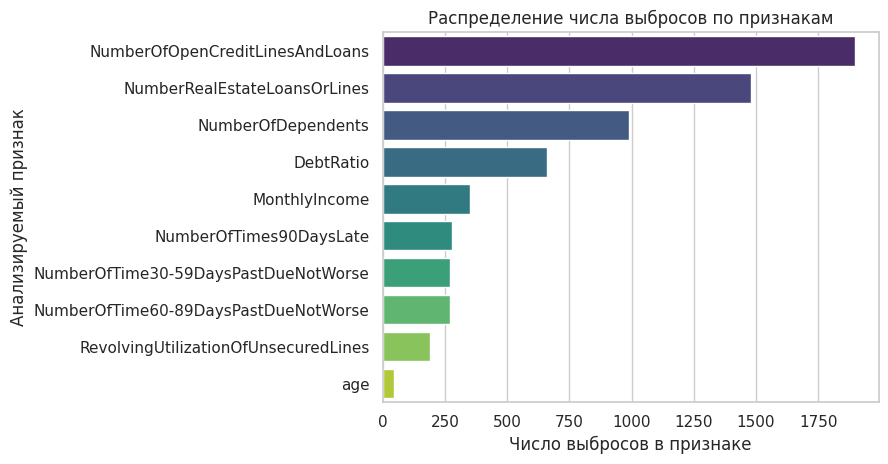

In [ ]:
# Сортируем словарь с пропусками по числу пропусков в столбцах (по убыванию)
outliers_count =  dict(sorted(outliers_count.items(), key=lambda item: -item[1]))

# Создаем визуализацию в формате столбчатой диаграммы
barplot = sns.barplot(x=list(outliers_count.values()),
                      y=list(outliers_count.keys()),
                      palette='viridis');
# Задаем заголовок к диаграмме
barplot.set_title("Распределение числа выбросов по признакам");
# Задаем ось Х
barplot.set_xlabel("Число выбросов в признаке");
# Задаем ось Y
barplot.set_ylabel("Анализируемый признак");

Как видно из графиков наибольшее число выбросов имеют признаки?
* __NumberOfOpenCreditLinesAndLoans__ - число открытых кредитов и кредитных линий на данный момент
* __NumberRealEstateLoansOrLines__ - число открытыъ кредитных линий на покупку жилья
* __NumberOfDependents__ - число иждивенцев (финансово зависимых) людей в семье, финансовую нагрузку за которых берет на себя кредитуемый

Вернемся к очищенным данным и определим, какую часть данных мы убрали, в ходе определения выбросов через z-score

In [ ]:
# Выведем обновленные данные
cleaned_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,5400.0,8,0,3,0,0.0


In [ ]:
# Выведем размерности данных
print(f"""Размерность данных до удаления выбросов составляла:
{data.shape[0]} строк и {data.shape[1]} столбцов.

Размерность данных после удаления выбросов составляет:
{cleaned_data.shape[0]} строк и {cleaned_data.shape[1]} столбцов.

Всего было удалено {data.shape[0] - cleaned_data.shape[0]} записей и {data.shape[1] - cleaned_data.shape[1]} признаков.""")

Размерность данных до удаления выбросов составляла:
150000 строк и 11 столбцов.

Размерность данных после удаления выбросов составляет:
144555 строк и 11 столбцов.

Всего было удалено 5445 записей и 0 признаков.


Как видно число признаков не изменилось, а число записей уменьшилось с __150.000__ до __144.555__ записей. Я удалил __5445 записей о клиентах__, чьи данные могли ухудшить качество алгоритма, за счет наличия экстремально больших и/или экстремально малых значений.

### 3. Визуализация распределения ключевых признаков

Теперь, когда в данных нет пропусков и выбросов можно провести визуализацию распределения данных по признакам.

Для этого, построим коробчатую диаграмму для каждого признака, кроме целевого.

In [ ]:
cleaned_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000,144555.000000
mean,0.064999,0.423793,52.267697,0.241853,300.925285,6073.975082,8.145772,0.090588,0.948580,0.064737,0.725507
std,0.246526,7.172601,14.838551,0.689255,871.449563,3957.247407,4.596664,0.474211,0.933119,0.328827,1.032748
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029319,41.000000,0.000000,0.172829,3840.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.151114,52.000000,0.000000,0.362012,5400.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556141,63.000000,0.000000,0.849939,7204.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,747.000000,96.000000,12.000000,6466.000000,45000.000000,23.000000,12.000000,4.000000,11.000000,4.000000


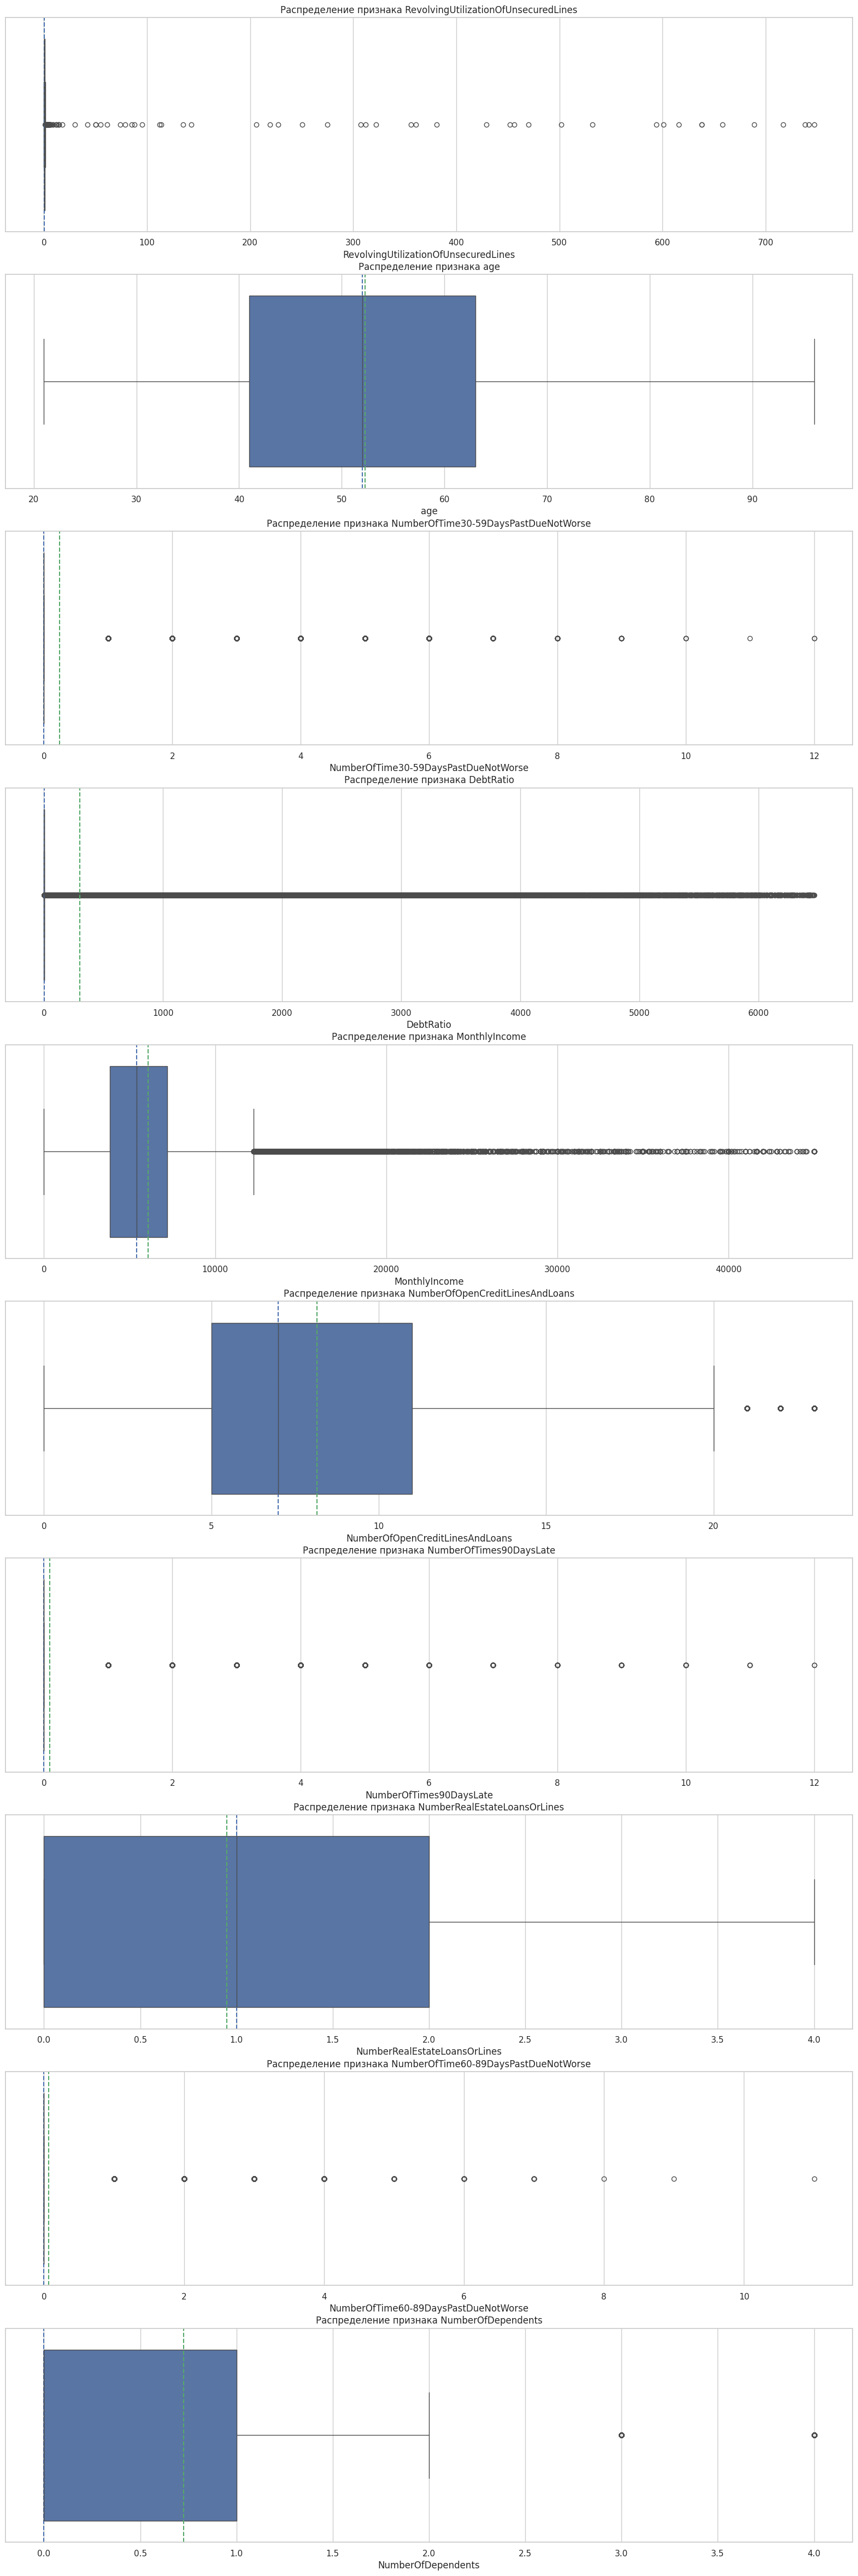

In [ ]:
# Выделим признаки для построения диаграмм, за исключением целевого признака - SeriousDlqin2yrs
visualization_features = cleaned_data.columns.tolist()[1:]
# Создаем пространство для визуализации признаков
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 60))
# Теперь пройдемся по каждому из признаков и провизуализируем данные из него
# В первом столбце визуализация будет в формате коробчатой диаграммы
# Во втором столбце визуализация будет в формате гистограммы
for i, feature in enumerate(visualization_features):
    # Строим коробчатую диаграмму
    sns.boxplot(data=cleaned_data, x=feature, ax=axes[i]);
    # Добавляем название для коробчатой диаграммы
    axes[i].set_title(f'Распределение признака {feature}');
    # Добавляем подпись оси Х
    axes[i].set_xlabel(feature);
    # Добавляем визуализацию среднего
    axes[i].axvline(cleaned_data[feature].mean(), color='g', linestyle='--');
    # Добавляем визуализацию медианы
    axes[i].axvline(cleaned_data[feature].median(), color='b', linestyle='--');

Получив визуализацию распределений в признаках, можно прийти к следующим выводам:
1. Признак __RevolvingUtilizationOfUnsecuredLines__ показывающий отношение баланса кредитных карт и кредитных линий в отношении к сумме кредитных лимитов. По сути данный признак отражает степень использования заемщиком доступного кредитного лимита. Чем выше данный показатель, тем выше вероятность невозврата кредита.

  У большей части заемщиков данных показатель достаточно низкий, однако есть случаи, где показатель сильно превышает норму, что свидетельствует о риске дефолта подобных клиентов. В среднем клиент использует около __42%__ доступных ему кредитных лимитов.

2. Признак __age__ отражает возраст описанных клиентов. Из данных следует, что средний и медианный возраст крайне близки и составляют __52 года__. Минимальный возраст кредитора в представленных данных составляет __21 год__, а максимальный - __96 лет__. Для банка важен показатель возраста клиента, поскольку пока клиент находится в возрасте от 21 до 55 лет, высока вероятность возврата кредитных средств банку.

  В случае, если возраст равен __менее чем 21 году__, для банка подобный __клиент будет является рисковым__, за счет отсутствия кредитной истории или активной работы. Возраст __более 55 лет__ также __является рисковым__, поскольку клиенты данного возраста имеют риск выхода в дефолт из-за потери работы, травм, или невозможности обслуживать кредит.

3. Признак __NumberOfTime30-59DaysPastDueNotWorse__ - отражает число раз, когда клиент просрочил платеж на 30-59 дней (очень часто такую просрочку называют коротким дефолтом). У большинства клиентов данных показатель равен нулю, однако есть клиенты, которые просрочивали платеж более 10 раз за 2 года, что свидетельствует об их финансовой нестабильности и рисках для банка.

4. Признак __DebtRatio__ показывает соотношение выплат по долгам, алиментам и расходам, деленные на месячный валовый доход (некий коэффициент задолженности). По сути, чем выше данный показатель тем хуже для банка, поскольку если сумма трат клиента превышает доход, то это означает, что клиенту сложнее платить по кредитным счетам. В случае, если сумма расходов меньше суммы доходов, банк может выделить б__о__льшую сумму в качестве кредита, поскольку клиент сможет покрыть ее за счет дельты между доходами и расходами.

  Медианное значение данного признака в данных равняется __0.362012__, что свидетельтсвует о том, что чаще клиенты отдают более __трети дохода__ на выплату кредитов и долгов.

5. Признак __MonthlyIncome__ - указывает на размер ежемесячного дохода клиента. Медианный ежемесячный доход по описываемым данным __составляет 5400 долларов__, а среднее значение равняется __6073 долларам__.
  
  Данный показатель помогает оценить уровень финансовой нагрузки, которую клиент может вынести, а в купе с признаком __DebtRatio__ помогает оценить примерную сумму расходов клиентов по кредитным платежам.

6. Признак __NumberOfOpenCreditLinesAndLoans__ - помогает понять число открытых кредитов и кредитных линий у клиента на текущий момент. Медианное значение данного признака находится на уровне __7 кредитов__, а __среднее - чуть более 8 единиц__. По сути это означает, что у среднестатистического клиента открыто около 7-8 кредитов (кредитов, кредитных карт, рассрочек, ипотек).

  Для банка данный признак позволяет оценить общую долговую нагрузку клиента, а также предложить условия по перекредитованию, чтобы привлечь клиента в свою финансовую организацию.

7. Признак __NumberOfTimes90DaysLate__ указывает на число просрочек клиентов выплат на 90 и более дней. По логике, данный признак должен наиболее сильно влиять не целевой, поскольку именно он отражает поведенческие паттерны клиента и помогает понять, просрочит клиент платеж, или нет.

  В описанных данных медианное значение данного признака __равняется нулю__, а __среднее - 0.09__. Присутствуют данные о клиентах, просрочивших выплаты более нуля раз, однако таковых клиентов явное меньшенство.

8. Признак __NumberRealEstateLoansOrLines__ - отражает число кредитных линий на покупку жилья. __Среднее и медиана данного признака в данных почти равны, и находятся около единицы__. Из чего мы можем сделать вывод, что у каждого клиента имеется как минимум 1 кредит, связанный с покупкой жилья, или ипотекой.

9. Признак __NumberOfTime60-89DaysPastDueNotWorse__ - еще один показатель числа просрочек. В данном случае - количество раз, когда клиент просрочил платеж на 60-89 дней, за последние 2 года. Данный признак помогает нам более точечно определить количество просрочек платежей.

  __Медиана по данному признаку равняется нулю__, а __среднее значение - примерно 0.06__. Т.е. можно констатировать, что число задержек выплат на такой срок достаточно мало.

10. Признак __NumberOfDependents__ - указывает на число иждивенцев в семье. Т.е. по сути является показателем того, за кого помимо себя должен платит клиент.

  __Медиана__ данного признака __равна нулю__, а __среднее значение__ находится __вблизи единицы__. Т.е. можно сказать, что на 100 человек, взявших кредит, - 72 человека обязательно живут и обеспечивают иждивенца.

Проведя анализ данных, мы можем описать портрет нашего клиента:

1. Доходы и благосостояние
  * Находится в возрасте от 21 до 96 лет, __преимущественно попадает в категорию от 41 до 63 лет__
  * Имеет доход __от 5400 до 6000 долларов в месяц__
  * В __72 случаях из 100 имеет иждивенца__, которого вынужден обеспечивать

2. Кредитная активность
  * Имеет __около 7-8 открытых кредитных продуктов__
  * Имеет как минимум __1 кредитный продукт, связанный с недвижимостью__ - ипотека, кредит, рассрочка
  * Использует около __40% доступных кредитных средств__
  * Тратит __около 36% получаемых средств на выплаты по кредитам__

3. Финансовая дисциплина
  * __Никогда не допускал просрочки по выплатам в период 30-59 дней__ после даты обязательной выплаты
  * __Никогда не допускал просрочки по выплатам в период 60-89 дней__ после даты обязательной выплаты
  * __Никогда не допускал просрочки по выплатам на 90 и более дней__ после даты обязательной выплаты
  

### 4. Методы борьбы с дисбалансом классов

Теперь проанализируем данные конечных классов и рассмотрим соотношение классов в представленных данных

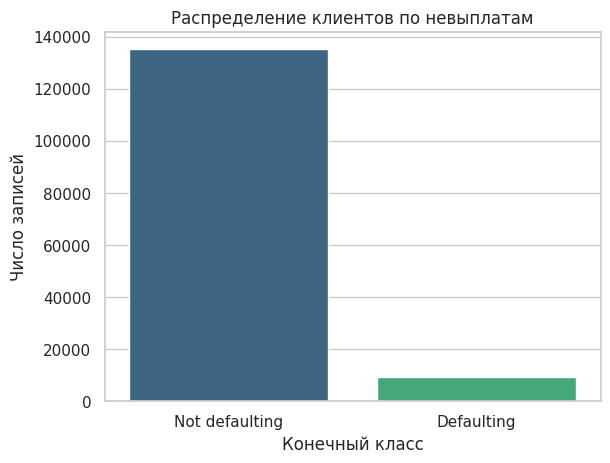

In [ ]:
# Сформируем датасет для четкой визуализации
y_visualization = pd.DataFrame(
    {
        "Class": ["Not defaulting", "Defaulting"],
        "Count": cleaned_data["SeriousDlqin2yrs"].value_counts().values.tolist()
    }
)
# Строим столбчатую диаграмму для визуализации классов в данных
barplot = sns.barplot(x="Class", y="Count", data=y_visualization, palette='viridis')
# Задаю заголовок
barplot.set(title="Распределение клиентов по невыплатам",
            xlabel="Конечный класс",
            ylabel="Число записей");

Как видно из данных, б__о__льшая часть никогда не допускали просрочки, а меньшая часть клиентов считается клинтами, просрочившими платежи.

__В данном случае, распределение классов очень нестабильное, что будет ухудшать качество модели. Однако есть несколько вариантов борьбы с данной проблемой:__
1. Изменить веса классов. Можно явно увеличить важность малочисленного класса, чтобы компенсировать тот недостаток данных, который имеем.
2. Сбалансировать классы при построении модели. Для этого можно:
  1. Сократить число примеров доминирующего класса (Undersampling)
  2. Увеличить число примеров меньшего класса, путем дублирования существующих объектов, или генерации новых с помощью SMOTE (Oversampling)
3. Использовать ансамблевый метод, адаптированных для несбалансированных данных. Например, мы можем использовать бэггинг со взвешиванием, или бустинг с коррекцией весов классов.

</br>

__Альтернативные варианты, не реализуемые в данный момент, которые также могут помочь повысить точность данных и сбалансированность классов:__
1. Расширить датасет путем сбора большего числа данных. В данном случае это не представляется возможным, поскольку нет источника данных, через который можно расширить датасет.
2. Сгенерировать синтетические данные, на основании сущетсующих данных. Такой подход потребует много вычислительных ресурсов, однако сможет дать хороший результат.
3. Использовать каскадные модели, где первая модель будет выбирать подозрительные образцы, а последующие модели будут давать финальную оценку, обеспечивая лучшее распознавание редких классов.

## 2. Построение и оценка модели

### 1. Разделение данных

Теперь необходимо подготовить очищенные данные к обучению. Для этого разделим данные на тренировочную, валидационную и тестовую выборки с помощью функции __train_test_split__ из библиотеки __sklearn__

In [ ]:
# Выделим признаки для обучения и призаки конечных классов
X = cleaned_data.drop("SeriousDlqin2yrs", axis=1)
y = cleaned_data["SeriousDlqin2yrs"]
# Теперь разделим данные на тренировочную и тестовую выборки в соотношении 80 на 20
X_train, X_test, y_train, y_test = train_test_split(X,                # Выделяем фичи для обучения
                                                    y,                # Выделяем конечные классы
                                                    test_size=0.2,    # Определяем размер тестовой выборки
                                                    random_state=42,  # Фиксируем воспроизводимость
                                                    stratify=y)       # Стратифицируем по конечным класса

Теперь разделим тренировочную выборку на тренировочную и валидационную

In [ ]:
# Разделим данные на тренировочную и валидационную выборки в соотношении 80 на 20
X_train_data, X_val, y_train_data, y_val = train_test_split(X_train,                # Выделяем фичи для обучения
                                                            y_train,                # Выделяем конечные классы
                                                            test_size=0.2,          # Определяем размер тестовой выборки
                                                            random_state=42,        # Фиксируем воспроизводимость
                                                            stratify=y_train)       # Стратифицируем по конечным класса

### 2. Обучение моделей

#### 1. Логистическая регрессия

Обучим модель логистической регрессии на тренировочных данных. Для оценки качества предсказательной способности на данном этапе будем использовать валидационную выборку.

In [ ]:
# Инициализируем модель логистической регрессии
loggistic_model = LogisticRegression(solver='liblinear',      # Указываем явно алгоритм оптимизации
                                     class_weight='balanced', # Балансируем классы между собой
                                     random_state=42,         # Фиксируем воспроизводимость
                                     max_iter=1000,           # Фиксируем максимальное число итераций
                                     n_jobs=-1)               # Использую все доступные ядра процессора
# Обучаем модель логистической регрессии на тренировочной выборке
loggistic_model.fit(X_train_data, y_train_data)
# Получим предсказание для валидационных данных
y_pred_val = loggistic_model.predict(X_val)

Теперь проведем оценку качества полученных предсказаний, путем расчета метрик на валидационной выборке

In [ ]:
# Проведем оценку качества модели по основным метрикам
print("Используем Classificaiton Report для копмлексной оценки качества модели:")
print(classification_report(y_val, y_pred_val))
print("ROC-AUC на валидационной выборке равен:", roc_auc_score(y_val, y_pred_val))
print("GINI на валидационной выборке равен:", 2 * roc_auc_score(y_val, y_pred_val) - 1)

Используем Classificaiton Report для копмлексной оценки качества модели:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     21626
           1       0.26      0.64      0.37      1503

    accuracy                           0.86     23129
   macro avg       0.62      0.76      0.65     23129
weighted avg       0.93      0.86      0.88     23129

ROC-AUC на валидационной выборке равен: 0.7562800660278137
GINI на валидационной выборке равен: 0.5125601320556274


#### 2. Градиентный бустинг (CatBoost)

Теперь обучим модель градиентного бустинга для того, чтобы сравнить качество классификации между логистической регрессией и градиентным бустингом

Первым шагом превратим данные в Pool-формат, для подачи их на вход модели CatBoost

In [ ]:
# Создалим train_pool для тренировочной выборки
train_pool = catboost.Pool(X_train_data, y_train_data)
# Создадим val_pool для валидационной выборки
val_pool = catboost.Pool(X_val, y_val)

Обучим модель градиентного бустинга, используя данные в приведенном к нужному виду формате

In [ ]:
# Инициализируем модель классификатора CatBoost
ctb_classificator1 = catboost.CatBoostClassifier(
    # Задаю явно максимальное число итераций - 1000
    iterations=1000,
    # Задаю возможность использовать все ядра
    thread_count=-1,
    # Задаю веса классов
    class_weights={0:9396, 1:135159},
    # Задаю максимальную глубину дерева
    depth=8,
    # Задаю тип решаемой задачи - бинарная классификация
    loss_function='Logloss',
    # Задаю метрику качества - ROC-AUC
    custom_metric='AUC',
    # Задаю информацию о том, как часто выводить информацию
    verbose=1000,
    # Фиксирую воспроизводимость
    random_seed=42
)

# Обучаю модель на train_pool
ctb_classificator1.fit(train_pool)
# Создаю предсказание на val_pool
y_pred_val_catboost = ctb_classificator1.predict(val_pool)

Learning rate set to 0.071204
0:	learn: 0.6641667	total: 11.8ms	remaining: 11.8s
999:	learn: 0.2710718	total: 9.94s	remaining: 0us


Теперь оценим качество предсказания с помощью расчета метрик

In [ ]:
# Проведем оценку качества модели по основным метрикам
print("Используем Classificaiton Report для копмлексной оценки качества модели:")
print(classification_report(y_val, y_pred_val_catboost))
print("ROC-AUC на валидационной выборке равен:", roc_auc_score(y_val, y_pred_val_catboost))
print("GINI на валидационной выборке равен:", 2 * roc_auc_score(y_val, y_pred_val_catboost) - 1)

Используем Classificaiton Report для копмлексной оценки качества модели:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     21626
           1       0.26      0.65      0.37      1503

    accuracy                           0.85     23129
   macro avg       0.61      0.76      0.64     23129
weighted avg       0.93      0.85      0.88     23129

ROC-AUC на валидационной выборке равен: 0.7586202329457427
GINI на валидационной выборке равен: 0.5172404658914853


Посмотрим на модель градиентного бустинга, обученную с использованием GPU и б__о__льшим числом итераций

In [ ]:
# Инициализируем модель классификатора CatBoost
ctb_classificator2 = catboost.CatBoostClassifier(
    # Задаю явно максимальное число итераций
    iterations=3000,
    # Задаю возможность использовать все ядра
    thread_count=-1,
    # Задаю веса классов
    class_weights={0:9396, 1:135159},
    # Задаю максимальную глубину дерева
    depth=8,
    # Задаю тип решаемой задачи - бинарная классификация
    loss_function='Logloss',
    # Задаю метрику качества - ROC-AUC
    custom_metric='AUC',
    # Задаю информацию о том, как часто выводить информацию
    verbose=1000,
    # Фиксирую воспроизводимость
    random_seed=42,
    # Указываю тип задачи
    task_type='GPU'
)

# Обучаю модель на train_pool
ctb_classificator2.fit(train_pool)
# Создаю предсказание на val_pool
y_pred_val_catboost2 = ctb_classificator2.predict(val_pool)

Learning rate set to 0.00982
0:	learn: 0.6880757	total: 10.4ms	remaining: 31s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3877365	total: 6.76s	remaining: 13.5s
2000:	learn: 0.3357572	total: 13.4s	remaining: 6.69s
2999:	learn: 0.2950609	total: 20.1s	remaining: 0us


Теперь оценим качество предсказания с помощью расчета метрик на GPU-модели

In [ ]:
# Проведем оценку качества модели по основным метрикам
print("Используем Classificaiton Report для копмлексной оценки качества модели:")
print(classification_report(y_val, y_pred_val_catboost2))
print("ROC-AUC на валидационной выборке равен:", roc_auc_score(y_val, y_pred_val_catboost2))
print("GINI на валидационной выборке равен:", 2 * roc_auc_score(y_val, y_pred_val_catboost2) - 1)

Используем Classificaiton Report для копмлексной оценки качества модели:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     21626
           1       0.24      0.66      0.36      1503

    accuracy                           0.85     23129
   macro avg       0.61      0.76      0.63     23129
weighted avg       0.93      0.85      0.88     23129

ROC-AUC на валидационной выборке равен: 0.7580523930098433
GINI на валидационной выборке равен: 0.5161047860196866


### 3. Расчет метрик для каждой модели

Теперь, используя полученные модели, я создам предсказания на базе тестовых выборок, которые не участвовали в обучени и оценке и с помощью метрик рассчитаю качество и точность каждой модели

In [ ]:
# Получим предсказание для тестовой выборки на логистической регресии
y_test_pred_loggistic_model = loggistic_model.predict(X_test)
# Получим предсказание для тестовой выборки на градиентном бустинге без GPU
y_test_pred_catboost1 = ctb_classificator1.predict(X_test)
# Получим предсказание для тестовой выборки на градиентном бустинге с GPU
y_test_pred_catboost2 = ctb_classificator2.predict(X_test)

In [ ]:
# Создаю список для записей метрик каждой модели
metric_list = []
# Указываю названия моделей
model_names = ["Логистическая регрессия", "Градиентный бустинг (CatBoost) без GPU", "Градиентный бустинг (CatBoost) с GPU"]
# Указываю список соответствующих предсказаний
model_predictions = [y_test_pred_loggistic_model, y_test_pred_catboost1, y_test_pred_catboost2]
# Прохожусь циклом по значениям и считаю метрики
for model_name, model_prediction in zip(model_names, model_predictions):
    # Рассчитываю значение f1-score
    f1 = f1_score(y_test, model_prediction)
    # Рассчитываю значение roc-auc
    roc_auc = roc_auc_score(y_test, model_prediction)
    # Рассчитываю значение precision
    precision = precision_score(y_test, model_prediction)
    # Рассчитываю значение recall
    recall = recall_score(y_test, model_prediction)
    #Рассчитываю значение accuracy
    accuracy = accuracy_score(y_test, model_prediction)
    # Записываю в список значения в виде словаря
    metric_list.append({
        "Модель": model_name,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy
    })
# Преобразую список в табличный формат
metrics_data = pd.DataFrame(metric_list)
# Вывожу таблицу с результатами на экран
metrics_data.head()

,Модель,F1-Score,ROC-AUC,Precision,Recall,Accuracy
0,Логистическая регрессия,0.370968,0.760117,0.259749,0.648749,0.857009
1,Градиентный бустинг (CatBoost) без GPU,0.371739,0.765552,0.258178,0.663651,0.854208
2,Градиентный бустинг (CatBoost) с GPU,0.358094,0.761548,0.244910,0.665780,0.844869


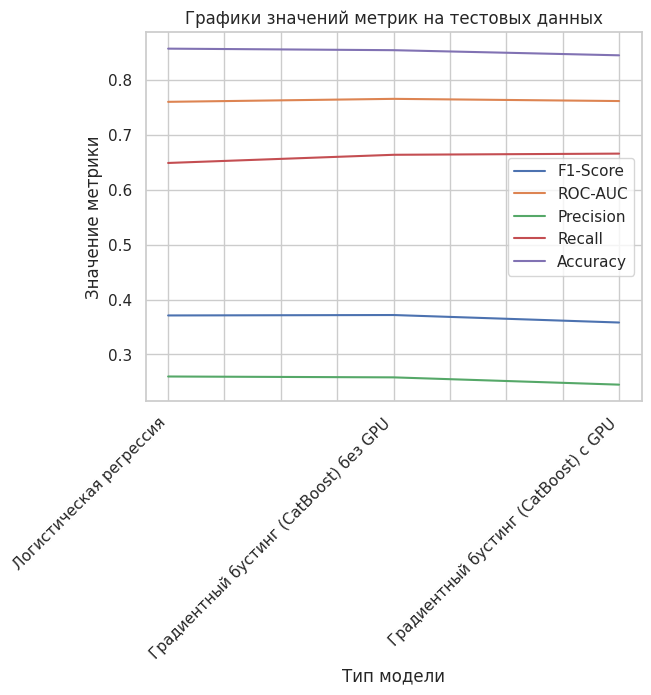

In [ ]:
# Задаю параметры для визуализации значений метрик

metrics_data.plot(# Указываю признак для визуализации
                  x="Модель",
                  # Указываю метрики
                  y=["F1-Score", "ROC-AUC", "Precision", "Recall", "Accuracy"],
                  # Тип графика - прямая линия
                  kind="line",
                  # Задаю заголовок графика
                  title="Графики значений метрик на тестовых данных",
                  # Задаю название по оси Х
                  xlabel="Тип модели",
                  # Задаю название по оси Y
                  ylabel="Значение метрики");
# Поворачиваю названия на 45 градусов
plt.xticks(rotation=45, ha='right');

Как видно по итоговой таблице лучшие значения __f1_score__ и __roc-auc__ наблюдаются у модели __классификатора catboost без GPU__. Лучшие __accuracy__ и __precision__ у __логистической регресии__, а __recall__ у __классификатора catboost c GPU__

В целом можно сделать вывод, что применение GPU в данной задаче не позволит получить лучшее качество. Вместо этого лучше применять подбор гиперпараметров к классификатору catboost, т.к. его показатели наиболее эффективны с бизнес-точки зрения ввиду того, что __roc-auc__ напрямую коррелирует с показателем __Джинни (Gini)__, а каждый п.п. Джинни конвертируется в финансовую выгоду компании.

### 4. Проверка устойчивости моделей через кросс-валидацию

Теперь проверим устойчивость моделей через кросс-валидацию. В качестве данных будем использовать все имеющиеся тренировочные данные, число разбиений поставим равным 5

In [ ]:
# Определю метрики, для расчетов на кросс-валидации
scoring_metrics = {'f1': make_scorer(f1_score),
                   'roc_auc': make_scorer(roc_auc_score),
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score),
                   'accuracy': make_scorer(accuracy_score)
}

# Для качественной оценки, задаю модели повторно, чтобы не использовать предобученные модели

# Инициализиру модель логистической регрессии для кросс-валидации
loggistic_model_cross_val = LogisticRegression(solver='liblinear',      # Указываем явно алгоритм оптимизации
                                               class_weight='balanced', # Балансируем классы между собой
                                               random_state=42,         # Фиксируем воспроизводимость
                                               max_iter=1000,           # Фиксируем максимальное число итераций
                                               n_jobs=-1)               # Использую все доступные ядра процессора

# Инициализируем модель классификатора CatBoost без GPU
ctb_classificator1_cross_val = catboost.CatBoostClassifier(
    # Задаю явно максимальное число итераций - 1000
    iterations=1000,
    # Задаю возможность использовать все ядра
    thread_count=-1,
    # Задаю веса классов
    class_weights={0:9396, 1:135159},
    # Задаю максимальную глубину дерева
    depth=8,
    # Задаю тип решаемой задачи - бинарная классификация
    loss_function='Logloss',
    # Задаю метрику качества - ROC-AUC
    custom_metric='AUC',
    # Задаю информацию о том, как часто выводить информацию
    verbose=1000,
    # Фиксирую воспроизводимость
    random_seed=42
)

# Инициализируем модель классификатора CatBoost с GPU
ctb_classificator2_cross_val = catboost.CatBoostClassifier(
    # Задаю явно максимальное число итераций
    iterations=3000,
    # Задаю возможность использовать все ядра
    thread_count=-1,
    # Задаю веса классов
    class_weights={0:9396, 1:135159},
    # Задаю максимальную глубину дерева
    depth=8,
    # Задаю тип решаемой задачи - бинарная классификация
    loss_function='Logloss',
    # Задаю метрику качества - ROC-AUC
    custom_metric='AUC',
    # Задаю информацию о том, как часто выводить информацию
    verbose=1000,
    # Фиксирую воспроизводимость
    random_seed=42,
    # Указываю тип задачи
    task_type='GPU'
)

# Провожу кросс-валидацию логистической регрессии
scores_lgtc_reg = cross_validate(loggistic_model_cross_val, X_train, y_train, cv=5, scoring=scoring_metrics)
# Провожу кросс-валидацию градиентного бустинга без GPU
scores_gdbt_ctb1 = cross_validate(ctb_classificator1_cross_val, X_train, y_train, cv=5, scoring=scoring_metrics)
# Провожу кросс-валидацию градиентного бустинга с GPU
scores_gdbt_ctb2 = cross_validate(ctb_classificator2_cross_val, X_train, y_train, cv=5, scoring=scoring_metrics)

Learning rate set to 0.071204
0:	learn: 0.6643419	total: 12.6ms	remaining: 12.6s
999:	learn: 0.2744954	total: 9.94s	remaining: 0us
Learning rate set to 0.071204
0:	learn: 0.6640863	total: 10.7ms	remaining: 10.7s
999:	learn: 0.2726818	total: 10s	remaining: 0us
Learning rate set to 0.071204
0:	learn: 0.6637847	total: 11.3ms	remaining: 11.3s
999:	learn: 0.2733074	total: 10s	remaining: 0us
Learning rate set to 0.071204
0:	learn: 0.6637712	total: 11ms	remaining: 11s
999:	learn: 0.2752294	total: 9.97s	remaining: 0us
Learning rate set to 0.071205
0:	learn: 0.6636562	total: 12ms	remaining: 12s
999:	learn: 0.2686982	total: 9.87s	remaining: 0us
Learning rate set to 0.00982
0:	learn: 0.6880769	total: 8.94ms	remaining: 26.8s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3879952	total: 6.89s	remaining: 13.8s
2000:	learn: 0.3366674	total: 13.6s	remaining: 6.77s
2999:	learn: 0.2969230	total: 20.2s	remaining: 0us
Learning rate set to 0.00982
0:	learn: 0.6880074	total: 7.74ms	remaining: 23.2s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3870429	total: 6.68s	remaining: 13.3s
2000:	learn: 0.3366232	total: 13.4s	remaining: 6.67s
2999:	learn: 0.2960810	total: 20.3s	remaining: 0us
Learning rate set to 0.00982
0:	learn: 0.6879846	total: 7.86ms	remaining: 23.6s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3858094	total: 6.66s	remaining: 13.3s
2000:	learn: 0.3336029	total: 13.5s	remaining: 6.73s
2999:	learn: 0.2930504	total: 20.3s	remaining: 0us
Learning rate set to 0.00982
0:	learn: 0.6879971	total: 8ms	remaining: 24s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3887339	total: 6.78s	remaining: 13.5s
2000:	learn: 0.3368840	total: 13.5s	remaining: 6.73s
2999:	learn: 0.2962635	total: 20.2s	remaining: 0us
Learning rate set to 0.00982
0:	learn: 0.6880840	total: 7.73ms	remaining: 23.2s


Default metric period is 5 because AUC is/are not implemented for GPU


1000:	learn: 0.3874429	total: 6.63s	remaining: 13.2s
2000:	learn: 0.3336819	total: 13.3s	remaining: 6.65s
2999:	learn: 0.2938398	total: 20.1s	remaining: 0us


Теперь найдем средние значения метрик, полученных в ходе кросс-валидации, для каждой из моделей

In [ ]:
# Создаю список для записей метрик каждой модели после кросс-валидации
metric_val_list = []
# Указываю названия моделей
model_names = ["Логистическая регрессия cross_val", "Градиентный бустинг (CatBoost) без GPU cross_val", "Градиентный бустинг (CatBoost) с GPU cross_val"]
# Указываю список метрик, после кросс-валидации
models_metrics = [scores_lgtc_reg, scores_gdbt_ctb1, scores_gdbt_ctb2]
# Прохожусь циклом по значениям и считаю метрики
for model_name, model_metrics in zip(model_names, models_metrics):
    # Рассчитываю среднее значение f1-score после кросс-валидации
    f1 = model_metrics['test_f1'].mean()
    # Рассчитываю среднее значение roc-auc после кросс-валидации
    roc_auc = model_metrics['test_roc_auc'].mean()
    # Рассчитываю среднее значение precision после кросс-валидации
    precision = model_metrics['test_precision'].mean()
    # Рассчитываю среднее значение recall после кросс-валидации
    recall = model_metrics['test_recall'].mean()
    #Рассчитываю среднее значение accuracy после кросс-валидации
    accuracy = model_metrics['test_accuracy'].mean()
    # Записываю в список значения в виде словаря
    metric_val_list.append({
        "Модель": model_name,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy
    })
# Преобразую список в табличный формат
metric_val_data = pd.DataFrame(metric_val_list)
# Вывожу таблицу с результатами на экран
metric_val_data.head()

,Модель,F1-Score,ROC-AUC,Precision,Recall,Accuracy
0,Логистическая регрессия cross_val,0.355974,0.748134,0.248302,0.628575,0.852150
1,Градиентный бустинг (CatBoost) без GPU cross_val,0.361029,0.757390,0.249867,0.650657,0.850247
2,Градиентный бустинг (CatBoost) с GPU cross_val,0.352727,0.756558,0.241114,0.656910,0.843252


Теперь я объединю данные метрик после кросс-валидации и данные метрик, полученных на тестовой выборке. После чего построю график, отражающий значение метрик на тестовых данных и после кросс-валидации.

In [ ]:
# Создаю копию датасета с данными о метриках на test-данных
metrics_test_data = metrics_data.copy()
# Добавляю к названиям моделей подпись "test" для отражения тестовой выборки
metrics_test_data['Модель'] = metrics_test_data['Модель'] + ' test'
# Объединю данные метрик на тестовых данных и после кросс-валидации
metrics_full_data = pd.concat([metrics_test_data, metric_val_data])
# Вывожу таблицу с результатами на экран
metrics_full_data.head(6)

,Модель,F1-Score,ROC-AUC,Precision,Recall,Accuracy
0,Логистическая регрессия test,0.370968,0.760117,0.259749,0.648749,0.857009
1,Градиентный бустинг (CatBoost) без GPU test,0.371739,0.765552,0.258178,0.663651,0.854208
2,Градиентный бустинг (CatBoost) с GPU test,0.358094,0.761548,0.244910,0.665780,0.844869
0,Логистическая регрессия cross_val,0.355974,0.748134,0.248302,0.628575,0.852150
1,Градиентный бустинг (CatBoost) без GPU cross_val,0.361029,0.757390,0.249867,0.650657,0.850247
2,Градиентный бустинг (CatBoost) с GPU cross_val,0.352727,0.756558,0.241114,0.656910,0.843252


Теперь построим визуализацию значений метрик, чтобы оценить разницу между качеством моделей на тестовой выборке и на кросс-валидации

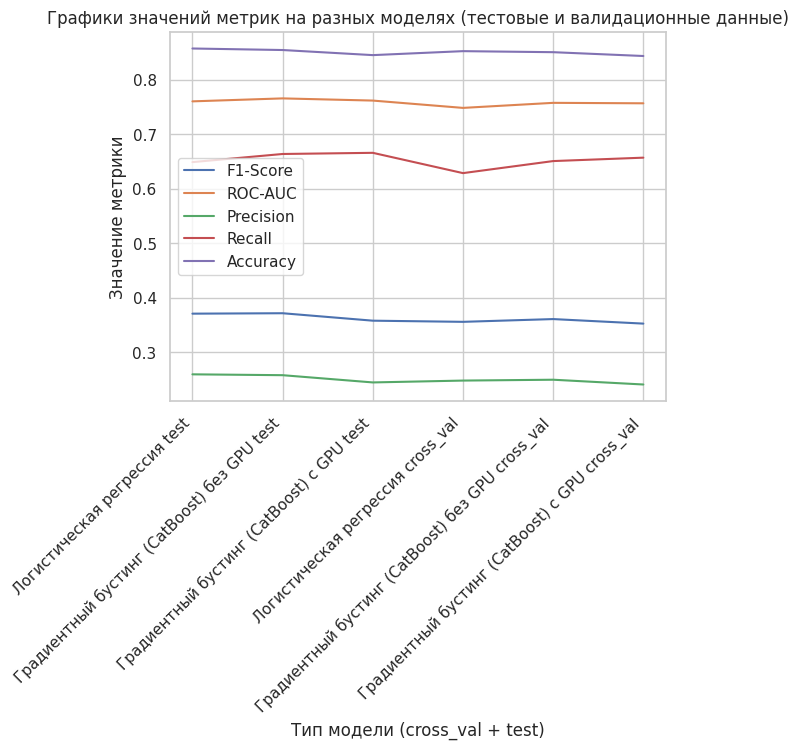

In [ ]:
# Задаю параметры для визуализации значений метрик после кросс-валидации и на тестовой выборке
metrics_full_data.plot(
                  # Указываю признак для визуализации
                  x="Модель",
                  # Указываю метрики
                  y=["F1-Score", "ROC-AUC", "Precision", "Recall", "Accuracy"],
                  # Тип графика - прямая линия
                  kind="line",
                  # Задаю заголовок графика
                  title="Графики значений метрик на разных моделях (тестовые и валидационные данные)",
                  # Задаю название по оси Х
                  xlabel="Тип модели (cross_val + test)",
                  # Задаю название по оси Y
                  ylabel="Значение метрики");
# Поворачиваю названия на 45 градусов
plt.xticks(rotation=45, ha='right');

После оценки качества модели на кросс-валидации и сравнения с тестовой выборкой, можно сделать выводом о том, что __значение метрик на кросс-валидации на 0.5-2% ниже, чем на тестовой выборке__.

Это свидетельствует о хорошей предсказательной способности модели, а также о том, что в среднем, при получени предсказания, значение метрик и качество на тестовых данных будет выше, чем было получено в процессе обучения и поиска гиперпараметров.

## 3. Интерпретация и этика

### 1. Выделите топ-5 признаков, влияющих на прогноз

Построив модели, а также сравнив их показатели через кросс-валидацию и тестовую выборку становится возможным определить важность каждого из признаков и их влияние на предсказание.

Для определения влияния признаков на предсказание я буду использовать библиотеку SHAP и графики из нее

Построим график shap.beeswarm для __модели логистической регрессии__

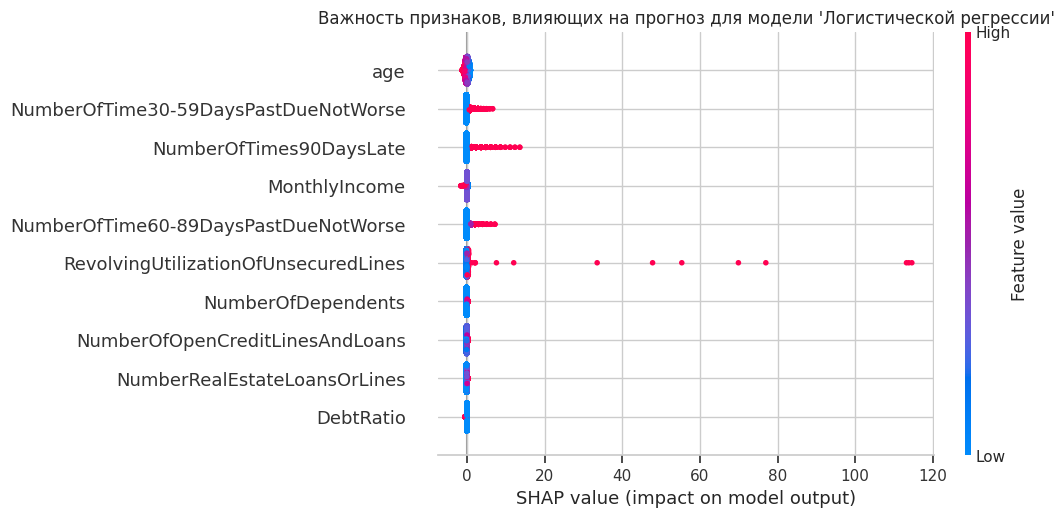

In [ ]:
# Создадим объект для объяснения предсказания
explainer_loggistic_model = shap.LinearExplainer(loggistic_model, X_test.values)
# Рассчитаем значения shap-значения
shap_values = explainer_loggistic_model(X_test)
# Создаю пространство для визуализации
fig, ax = plt.subplots(figsize=(16, 16))
# Визуализирую важность признаков
shap.plots.beeswarm(shap_values, show=False)
# Добавлю заголовок
plt.title(f"Важность признаков, влияющих на прогноз для модели 'Логистической регрессии'");
# Вывожу график
plt.show();

Построим график shap.beeswarm для __моделей градиентного бустинга с и без GPU__

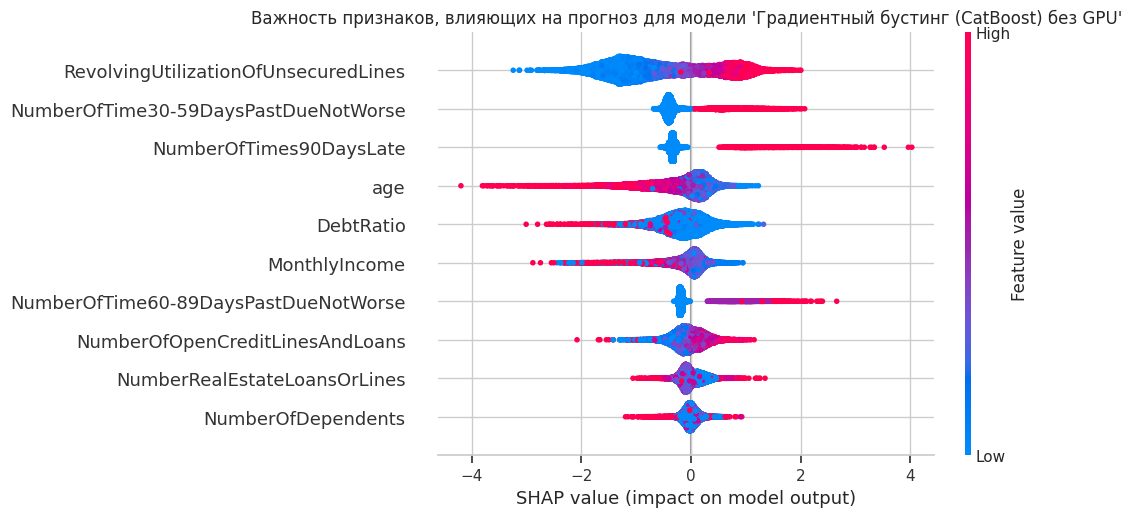

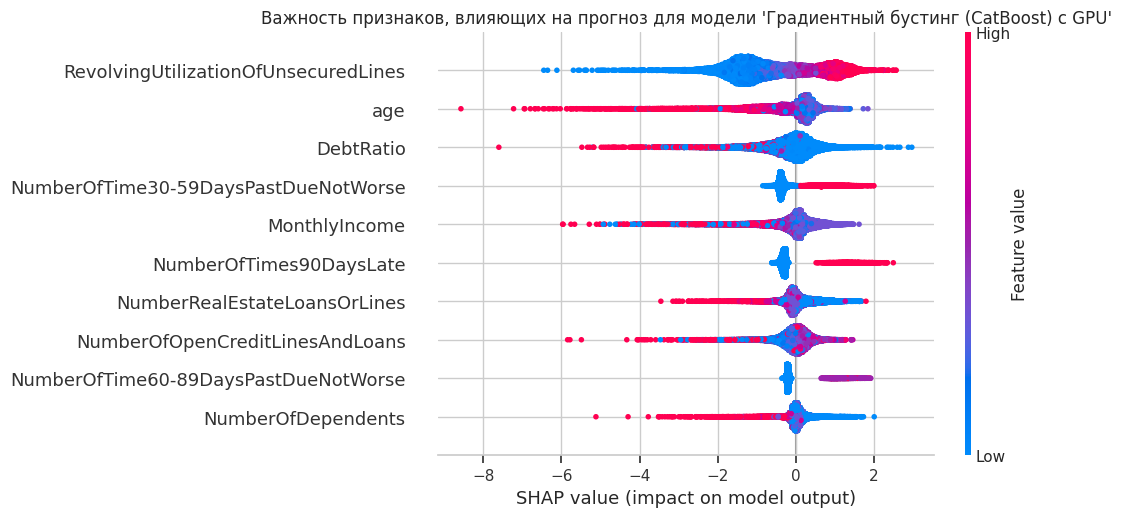

In [ ]:
# Напишу функцию, которая будет визуализировать вклад признаков в предсказание
def feature_importance(model, title=""):
  # Создадим объект для интерпретации важности признаков
  explainer = shap.TreeExplainer(model)
  # Рассчитаем важность признаков при прогнозе на тестовой выброке
  shap_values = explainer(X_test)
  # Создаю пространство для визуализации
  fig, ax = plt.subplots(figsize=(16, 16))
  # Визуализирую важность признаков
  shap.plots.beeswarm(shap_values, show=False)
  # Добавлю заголовок
  plt.title(f"Важность признаков, влияющих на прогноз для модели '{title}'");
  # Вывожу график
  plt.show();

# Выведем информацию о вкладе признаков в предсказание на модели градиентного бустинга без GPU
feature_importance(ctb_classificator1, title="Градиентный бустинг (CatBoost) без GPU")
# Выведем информацию о вкладе признаков в предсказание на модели градиентного бустинга с GPU
feature_importance(ctb_classificator2, title="Градиентный бустинг (CatBoost) с GPU")

### 2. Проверьте логичность влияния признаков

Теперь, имея диаграммы для каждой из трех моделей, я опишу топ-5 признаков по важности, а также обосную логичность влияния признаков на формирование предсказания моделью

Для модели __логистической регрессии__:

1. Описание признаков:
  1. Топ-5 самых важных признаков для построения предсказания: __age__, __NumberOfTime30-59DaysPastDueNotWorse__, __NumberOfTimes90DaysLate__, __MonthlyIncome__, __NumberOfTime60-89DaysPastDueNotWorse__
  2. Для признака __RevolvingUtilizationOfUnsecuredLines__ видно, что высокие значения признака положительно влияют на прогноз
  3. Признаки __NumberOfDependents__, __NumberOfOpenCreditLinesAndLoans__, __NumberRealEstateLoansOrLines__ и __DebtRatio__ - мало влияют на предсказание модели и их влияние, судя по графику, является околонулевым

2. Бизнес-влияние
  1. Увеличение возраста (признак __age__) и размера ежемесячного дохода (признак __MonthlyIncome__) снижают вероятность выхода в дефолт
  2. Случаи, когда клиент просрочивал платежи на 30-59, 60-89 или 90+ дней (признаки __NumberOfTime30-59DaysPastDueNotWorse__, __NumberOfTime60-89DaysPastDueNotWorse__ и __NumberOfTimes90DaysLate__) логично увеличивают вероятность выхода в дефолт, из-за невозможности обеспечивать кредит
  3. Признак отношения балансов кредитов и кредитных карт к сумме кредитных лимитов (__RevolvingUtilizationOfUnsecuredLines__) также влияет на потенциальный дефолт клиента. Слишком низкие остатки на кредитных счетах свидетельствуют о постоянной необходимости прибегать к кредитным средствам, что снижает вероятность выплаты кредита и повышает риск дефолта

Оценим влияние признаков на выход модели, для каждой из моделей

Для модели __градиентного бутинга без GPU__:

1. Описание признаков:
  1. __RevolvingUtilizationOfUnsecuredLines__, __NumberOfTime30-59DaysPastDueNotWorse__ и __NumberOfTimes90DaysLate__ являются самыми важными, более того высокие значения признаков положительно влияют на итоговый прогноз
  2. __Age__ и __DebtRatio__ свидетельствуют о том, что увеличение значения признака отрицательно влияет на прогноз

2. Бизнес-влияние:
  1. С увеличением показателя отношения баланса кредитов и кредитных карт к сумме лимитов (признак __RevolvingUtilizationOfUnsecuredLines__), а также просрочек на 30-59 или 90 дней (признаки __NumberOfTime30-59DaysPastDueNotWorse__ и __NumberOfTimes90DaysLate__) растет вероятность выхода клиента в дефолт
  2. Увеличение возраста (признак __Age__) и выплат по долгам (__DebtRatio__) снижают вероятность выхода в дефолт

</br>

Для модели __градиентного бутинга с GPU__:

1. Описание признаков:
  1. __RevolvingUtilizationOfUnsecuredLines__ и  __NumberOfTime30-59DaysPastDueNotWorse__ свидетельствуют о том, что высокие значения признаков положительно влияют на итоговый прогноз
  2. __Age__ и __DebtRatio__ и __MonthlyIncome__ свидетельствуют о том, что с увеличением значения признака влияние на прогноз становится отрицательным\
2. Бизнес-влияние:
  1. С увеличением показателя отношения баланса кредитов и кредитных карт к сумме лимитов (признак __RevolvingUtilizationOfUnsecuredLines__), а также просрочек на 30-59 (короткий дефолт - признак __NumberOfTime30-59DaysPastDueNotWorse__) растет вероятность выхода клиента в дефолт
  2. Увеличение возраста (признак __Age__), выплат по долгам (__DebtRatio__) и размера ежемесячной заработной платы (признак __MonthlyIncome__) снижают вероятность выхода клиента в дефолт

### 3. Оценка fairness модели: сравните метрики (FPR, TPR) для групп (например, молодые vs старше 40 лет)

Для того, чтобы оценить справедливость модели, буду использовать сравнения:
1. По возрасту (__age__) - до 40 лет и от 40 и более
2. По разрмеру ежемесячной зарплаты (__MonthlyIncome__) - до 5400 долларов (медиана) и от 5400 долларов и более
3. По числу иждивенцев (__NumberOfDependents__) - без иждивенцев и от 1 иждивенца

В качестве основной модели буду использовать - __модель градиентного бустинга (CatBoost) без GPU__

Напишу код, для расчета __FPR__ и __TPR__ на базе тех ответов, которые выдает модель в ходе предсказания на тестовых данных

In [ ]:
# Создам функцию для FPR и TPR
def make_fpr_tpr(y_true, y_pred):
  # Рассчитываем 4 базовых класса
  true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_pred).ravel()
  # Рассчитываю значение FPR
  FPR = false_positive / (false_positive + true_negative)
  # Рассчитываю значение TPR
  TPR = true_positive / (true_positive + false_negative)
  # Возвращаю значения в качестве результата работы модели
  return FPR, TPR

Теперь создам предсказание модели на тестовой выборке, после чего сохраню предсказание в качестве одного из столбцов в данных

In [ ]:
# Создаю предсказание модели
y_pred = ctb_classificator1.predict(X_test)
# Делаю копию тестовых данных
X_test_copy = X_test.copy()
# Сохраняю предсказание в качестве отдельного столбца
X_test_copy['y_pred'] = y_pred
# Сохраняю верные ответы также в качестве отдельного столбца
X_test_copy['y_true'] = y_test
# Вывожу таблицу с данными, чтобы посмотреть на ее вид
X_test_copy.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,y_pred,y_true
107933,0.274464,63,1,0.515323,4959.0,10,0,1,0,0.0,0,0
58116,0.989007,62,3,0.466096,6075.0,14,0,1,0,1.0,1,0
2616,0.019463,67,0,0.303271,6175.0,17,0,2,0,1.0,0,0
7213,0.288184,38,0,0.406247,10500.0,9,0,2,0,3.0,0,0
34932,0.546055,35,1,0.444244,7218.0,16,0,2,0,3.0,1,0


Теперь подготовлю данные для каждого из случаев проверки справедливости модели

In [ ]:
# Создаю данные для проверки моделей

# Группа младше 40 лет
young_test_data = X_test_copy[X_test_copy['age'] < 40].copy()
# Группа от 40 лет и старше
old_test_data = X_test_copy[X_test_copy['age'] >= 40]

# Группа с ЗП до 5400 долларов
poor_test_data = X_test_copy[X_test_copy['MonthlyIncome'] < 5400].copy()
# Группа с ЗП от 5400 долларов и более
rich_test_data = X_test_copy[X_test_copy['MonthlyIncome'] >= 5400].copy()

# Группа до 1 иждивенца
dependent_test_data_zero = X_test_copy[X_test_copy['NumberOfDependents'] < 1].copy()
# Группа от 1 иждивенца и более
dependent_test_data_not_zero = X_test_copy[X_test_copy['NumberOfDependents'] >= 1].copy()

#### 1. Оценка справедливости модели, для пользователей разного возраста

In [ ]:
# Вызываю функцию, для расчета FPR и TPR для возраста до 40 лет
FPR_young, TPR_young = make_fpr_tpr(y_true=young_test_data['y_true'], y_pred=young_test_data['y_pred'])
# Вызываю функцию, для расчета FPR и TPR для возраста от 40 лет
FPR_old, TPR_old = make_fpr_tpr(y_true=old_test_data['y_true'], y_pred=old_test_data['y_pred'])

# Вывожу информацию на экран:
print(f"""Для клиентов младше 40 лет:
1. FPR: {FPR_young}
2. TPR: {TPR_young}

Для клиентов старше 40 лет:
1. FPR: {FPR_old}
2. TPR: {TPR_old}
""")

Для клиентов младше 40 лет:
1. FPR: 0.22534955511167604
2. TPR: 0.7175925925925926

Для клиентов старше 40 лет:
1. FPR: 0.10880371660859466
2. TPR: 0.6352558895207149



Посмотрев на итоговый вывод можно констатировать, что модель __переоценивает__ риск выхода в дефолт молодых клиентов, однако __гораздо лучше__ находит тех, кто выходит в дефолт в более молодой возрастной группе.

Для более старшего поколения модель __более качественно__ распознает тех, кто не уходит в дефолт, однако __хуже определяет__ тех, кто действительно уходит в дефолт.

В зависимости от задачи банка, можно понять, в сторону чего делается приоритет:
1. Если приоритет на том, чтобы выявить тех, кто точно выйдет в дефолт, то модель гораздо лучше срабатывает на клиентах, возрастом __до 40 лет__
2. Если приоритет нацелен на то, чтобы снизить потери, от неодобрения кредитов тем, кто действительно вернет средства, то лучше использовать модель на клиентах __от 40 лет__

#### 2. Оценка справедливости модели, для пользователей разного достатка

In [ ]:
# Вызываю функцию, для расчета FPR и TPR для людей с ЗП до 5400 долларов
FPR_poor, TPR_poor = make_fpr_tpr(y_true=poor_test_data['y_true'], y_pred=poor_test_data['y_pred'])
# Вызываю функцию, для расчета FPR и TPR для людей с ЗП от 5400 долларов и более
FPR_rich, TPR_rich = make_fpr_tpr(y_true=rich_test_data['y_true'], y_pred=rich_test_data['y_pred'])

# Вывожу информацию на экран:
print(f"""Для клиентов с заработной платой менее 5400 долларов в месяц:
1. FPR: {FPR_poor}
2. TPR: {TPR_poor}

Для клиентов с заработной платой от 5400 долларов в месяц и более:
1. FPR: {FPR_rich}
2. TPR: {TPR_rich}
""")

Для клиентов с заработной платой менее 5400 долларов в месяц:
1. FPR: 0.18681113394358304
2. TPR: 0.709

Для клиентов с заработной платой от 5400 долларов в месяц и более:
1. FPR: 0.09696190126179101
2. TPR: 0.6120591581342435



Ситуация в чем-то похожа с предыдущим случаем. В нашем случае можно сказать, что модель __очень хорошо__ определила тех, кто вышел в дефолт и зарабатывает менее 5400 долларов в месяц. При этом __большее число добросовестных клиентов__ были признаны ненадежными заемщиками.

В случае с заработной платой от 5400 долларов в месяц и более, доля __неверно определенных добросовестных клиентов уменьшилась почти в 2 раза до 9.7%__ по сравнению с первой группой. Однако __меньшее число клиентов__ с заработной платой от 5400 долларов в месяц были отнесены к группе, ушедшей в дефолт.

Следовательно, стоит учитывать размеры заработной платы, как более весомый признак при построении предсказания.



#### 3. Оценка справедливости модели, для пользователей с и без иждивенцев

In [ ]:
# Вызываю функцию, для расчета FPR и TPR для людей без иждивенцев
FPR_zero, TPR_zero = make_fpr_tpr(y_true=dependent_test_data_zero['y_true'], y_pred=dependent_test_data_zero['y_pred'])
# Вызываю функцию, для расчета FPR и TPR для людей с 1 иждивенцем или более
FPR_not_zero, TPR_not_zero = make_fpr_tpr(y_true=dependent_test_data_not_zero['y_true'], y_pred=dependent_test_data_not_zero['y_pred'])

# Вывожу информацию на экран:
print(f"""Для клиентов без иждивенцев:
1. FPR: {FPR_zero}
2. TPR: {TPR_zero}

Для клиентов с 1 и более иждивенцами:
1. FPR: {FPR_not_zero}
2. TPR: {TPR_not_zero}
""")

Для клиентов без иждивенцев:
1. FPR: 0.11464930099175528
2. TPR: 0.6403242147923

Для клиентов с 1 и более иждивенцами:
1. FPR: 0.16164756168641928
2. TPR: 0.6894618834080718



Как видно из полученных оценок, количество людей, которых модель определила как тех, кто ушел в дефолт __примерно одинаково__ для __групп с и без иждивенцев__. Разница составляет всего 4% в пользу группы людей, имеющих иждивенцев.

Разница между теми, кто был ошибочно определен в группу лиц, потенциально уходящих в дефолт - более значительна. __Около 11.5% людей без иждивенцев__ были ошибочно определены в эту группу, в то же время в эту группу попало __около 16% людей с 1 и более иждивенцем__

## 4. Отчет о работе модели

### 1. Вывод о качестве модели и ее ограничениях

#### 1. Качество модели

In [ ]:
# Рассчитаем значения метрики ROC-AUC для каждой из моделей, оценивая вероятность перехода в дефолт, а не конечный класс
roc_auc_metrics = []
# Для логистической регрессии
for model in [loggistic_model, ctb_classificator1, ctb_classificator2]:
  # Получаем предсказание
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  # Рассчитываем значение ROC-AUC
  roc_auc_metrics.append(roc_auc_score(y_test, y_pred_proba))
# Добавляем новый столбец в DataFrame с метриками
metrics_data['ROC-AUC percentage'] = roc_auc_metrics
# Выводим данные на экран
metrics_data.head()

,Модель,F1-Score,ROC-AUC,Precision,Recall,Accuracy,ROC-AUC percentage
0,Логистическая регрессия,0.370968,0.760117,0.259749,0.648749,0.857009,0.838447
1,Градиентный бустинг (CatBoost) без GPU,0.371739,0.765552,0.258178,0.663651,0.854208,0.848609
2,Градиентный бустинг (CatBoost) с GPU,0.358094,0.761548,0.244910,0.665780,0.844869,0.835541


В процессе обучения, были использованы модели __логистической регрессии__, __градиентного бустина (CatBoost) без GPU__, а также __градиентного бустинга (CatBoost) с GPU__.

Описанные модели показали хорошее качество предсказания выхода клиента в дефолт. В частности, они показали высокие метрики:

| Модель | F1-Score | 	ROC-AUC | Precision | Recall | Accuracy | ROC-AUC percentage |
|-|-|-|-|-|-|-|
| Логистическая регрессия	| 0.370968	| 0.760117	| 0.259749	| 0.648749 | 	0.857009 | 0.838447 |
| Градиентный бустинг (CatBoost) без GPU	| 0.371739	| 0.765552	| 0.258178	| 0.663651	| 0.854208 | 0.848609 |
| Градиентный бустинг (CatBoost) с GPU	| 0.358982	| 0.763865	| 0.244953	| 0.671634	| 0.844108 | 0.836144 |

* Показатель точности __accuracy__ на всех обученных моделях выдавал стабильно высокое значение в районе __85%__
* Показатель умения модели отделять классы друг от друга __roc-auc__ находится на уровне __76%__. В то же время, при оценке вероятности перехода в дефолт, качество моделей возрастает до __83%__ и более
* Показатель __recall__ отражает достаточно хорошее покрытие положительных случаев (__около 65%__), т.е. модель достаточно качественно определяет вероятность ухода в дефолт клиента

Возможными улучшениями являются:
* Показатель __precision__ указывает на достаточно высокое число ложных срабатываний модели, что может негативно сказаться на клиентах, которым мы можем выдать кредит, однако модель будет считать, что данные клиенты являются неплатежеспособными
* Низкий показатель общего качества модели __f1_score__ напрямую связан с числом ложных срабатываний модели

#### 2. Ограничения модели

Модель показывает хорошую результативность, что подтверждается обучением на различных наборах данных, оценкой качества итогового предсказания с помощью последовательного применения модели к разным данным и стабильными показателями метрик.

В ходе проведения нескольких экспериментов было выявлено, что модель хуже справляется с клиентами, возраст которых более 40 лет, а также менее точно определяет клиентов, уходящих в дефолт, с достатком более 5400 долларов в месяц.

Решение данной проблемы возможно за счет дополнительного сбора данных, более четкой обработки и подготовки признаков, нормализации и масштабирования данных, что позволит уменьшить разброс данных при обучении и создании предсказания в модели.


### 2. Рекомендации по улучшению модели

__Рекомендации по сбору данных__

Часть из признаков, которые не были представлены в датасете можно дополнительно собрать, чтобы повысить качество входного набора данных

1. __Число активно работающих людей в семье__ - в данном случае, важно показать, работает ли помимо самого кредитуемого его супруг/супруга, поскольку это может облегчить финансовую нагрузку на семью
2. __Число погашенных кредитов__ - также может помочь в определении того, насколько хорошо клиент справлялся с кредитной нагрузкой
3. __Отношение срока выплаты по кредитному продукту, к сроку его выдачи__ - т.е., если клиенту был выдан кредит на 24 месяца, а клиент выплатил его за 18, то можно сказать, что клиент склонен быстрее выполнять свои финансовые обязательства, а следовательно клиент будет выгоден для банка, за счет более быстрого срока погашения задолженностей
4. __Размер остатка на счете__ - может помочь нам понять, какими накопленными средствами обладает клиент и может ли он их пустить на уплату по кредиту, в случае необходимости
5. __Длительность работы с клиентом__ - сколько лет клиент работает с финансовой организацией, по сути определяет преданность клиента и возможность долгосрочного взаимодействия
6. __Число открытых некредитных продуктов__ - поможет понять, имеет ли клиент программы страхования, дебетовые карты, вклады, инвестиционные и другие счета, а также средства на них, которые в случае невыплаты могут быть направлены на погашение кредита

__Рекомендации по обучению моделей__

В качестве альтернативного способа решения задачи, считаю возможным:
1. Использовать подбор гиперпараметров с помощью GridSearchCV и Optuna, для повышения качества модели
2. Использовать более сложные алгоритмы машинного обучения, например несколько градиентных бустингов, или нейронные сети
3. Обучать ансамбль из нескольких моделей градиентного бустинга, объядиняя их предсказания через логистическую регрессию


### 3. Решение примера: «Как изменится прогноз, если у заемщика появится иждивенец?»

Решение задачи о том, как изменится прогноз, при появлении иждивенца возможен 2 различными способами:
1. Аналитический подход - оценка с помощью построенной диаграммы через shap
2. Практический подход - оценка предсказания на известных данных с и без иждивенца

Выведу повторно диаграмму с данными о важности признаков для модели градиентного бустинга без GPU

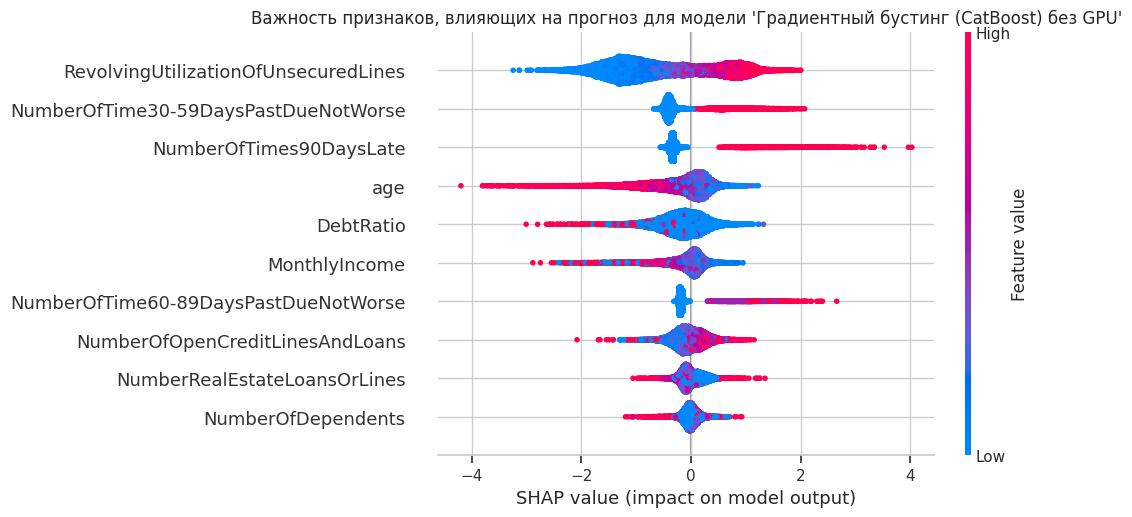

In [ ]:
# Выведем информацию о вкладе признаков в предсказание на модели градиентного бустинга без GPU
feature_importance(ctb_classificator1, title="Градиентный бустинг (CatBoost) без GPU")

По графику видно, что большое значение признака в большей степени уменьшает риск дефолта, для тех, у кого нет иждивенцев влияние на выход в дефолт околонулевое, а с ростом числа иждивенцев (возможно увеличение числа детей) возникает риск выхода в дефолт.

В целом, имеет смысл сравнить значения предсказаний на одних и тех же данных, изменяя лишь число иждивенцев в семье. Для этого возьмем данные о клиентах, у которых нет иждивенцев, из тестовой выборки

In [ ]:
# Возьмем 10 случаных индексов
import random
# Фиксируем воспроизводимость
random.seed(42)
# Создаем уникальные значения, по числу записей
unique_random_numbers = random.sample(range(0, 16934), 10)
# Строим вывод для каждого из случаев:
for idx in unique_random_numbers:
  # Возьмем ранее объединенные данные и удалим признак с предсказанием, после чего выделим одного клиента с отсутствием иждивенцев
  people = X_test_copy[X_test_copy['NumberOfDependents'] == 0].drop('y_pred', axis=1).iloc[idx].copy()
  # Выведем информацию о конеченом классе клиента
  print(f"Конечный класс у описываемого клиента - {people['y_true']}")
  # Удаляем признак из данных
  people = people.drop('y_true')
  # Теперь построим предсказание для данного клиента, по умолчанию, меняя число иждивенцев от 0 до 10 и оценивая результат, с помощью predict_proba()
  for x in range(10):
    # Записываю число иждивенцев
    people['NumberOfDependents'] = x
    # Получаю предсказание
    y_pred = ctb_classificator1.predict_proba(people.values.reshape(1, -1))[:, 1]
    # Вывожу результат
    print(f"Для клиента с {x} иждивенцев, вероятность дефолта составляет - {y_pred[0]}")
  # Вывожу пустую строку-разделитель
  print()

Конечный класс у описываемого клиента - 0.0
Для клиента с 0 иждивенцев, вероятность дефолта составляет - 0.8017053079722033
Для клиента с 1 иждивенцев, вероятность дефолта составляет - 0.6220773365256232
Для клиента с 2 иждивенцев, вероятность дефолта составляет - 0.6706823050135721
Для клиента с 3 иждивенцев, вероятность дефолта составляет - 0.5717468729788037
Для клиента с 4 иждивенцев, вероятность дефолта составляет - 0.5989687061772043
Для клиента с 5 иждивенцев, вероятность дефолта составляет - 0.5989687061772043
Для клиента с 6 иждивенцев, вероятность дефолта составляет - 0.5989687061772043
Для клиента с 7 иждивенцев, вероятность дефолта составляет - 0.5989687061772043
Для клиента с 8 иждивенцев, вероятность дефолта составляет - 0.5989687061772043
Для клиента с 9 иждивенцев, вероятность дефолта составляет - 0.5989687061772043

Конечный класс у описываемого клиента - 0.0
Для клиента с 0 иждивенцев, вероятность дефолта составляет - 0.637013224927602
Для клиента с 1 иждивенцев, веро

Как видно, количество иждивенцев влияет на вероятность выхода дефолт, в случае, если их число равняется 3 или меньше. После появления первого иждивенца вероятность выйти в дефолт чаще уменьшается.

Появление 2-го и 3-го иждивенца могут изменить картину, однако с появлением 4 и последующих иждивенцев признак никак не будет влиять на конечную вероятность.

Такое может происходить из-за отсутствия достаточной информации о клиентах с 4 и более иждивенцами, однако в целом можно сказать, что число иждивенцев влияет на кредитоспособность в случае их небольшого количества и реже влияет в случае их большего числа.

Более того, для обеих моделей градиентного бустинга, число иждивенцев являлось самым слабым фактором в определении вероятности дефолта, а для модели логистической регресси данный параметр был только 7-ым по важности.